In [31]:
# Import all necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import math
from sklearn.metrics import silhouette_score

In [32]:
N = 1000
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=N, n_features=2, centers=4, cluster_std=1,
center_box=(-10.0, 10.0), shuffle=True, random_state=1)


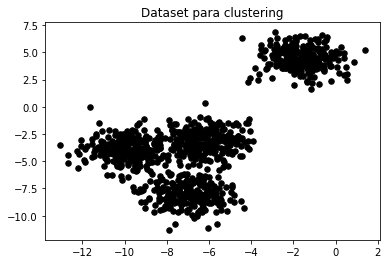

In [33]:
y = y % 2
plt.figure()
plt.title('Dataset para clustering')
plt.scatter(X[:,0], X[:,1],marker= 'o', s=30, color = 'black')
plt.show()

# Resposta letra B)

Aparentemente, olhando para a imagem, parece que o número ideal de clusters seria de k=4.

# Cotuvelo

In [34]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

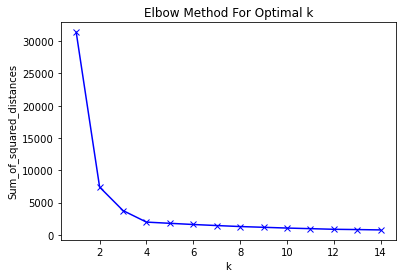

In [35]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Observando o método do cotuvelo, percebemos que o valor mais aproximado seria o de k=4, pois é onde conseguimos encontrar o ponto que parace a curva do cotuvelo.

In [36]:
init_clusters = 'k-means++'
# Fit K-means with Scikit
km = KMeans(n_clusters=4, init=init_clusters)
km.fit(X)

# Predict the cluster for all the samples
P = km.predict(X)


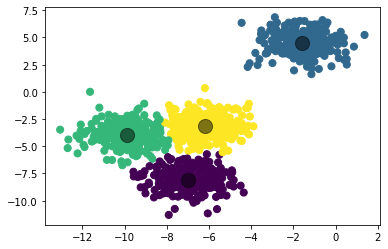

In [37]:
plt.scatter(X[:, 0], X[:, 1], c=P, s=50, cmap='viridis')

centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# Silhueta

In [38]:
#Use silhouette score
range_n_clusters = list (range(2,10))

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.7047494651336347)
For n_clusters = 3, silhouette score is 0.5837874966810302)
For n_clusters = 4, silhouette score is 0.6239074614020027)
For n_clusters = 5, silhouette score is 0.5413370906162519)
For n_clusters = 6, silhouette score is 0.46994644157275606)
For n_clusters = 7, silhouette score is 0.35817651648872756)
For n_clusters = 8, silhouette score is 0.32042854884284294)
For n_clusters = 9, silhouette score is 0.3281033962946748)


In [39]:
init_clusters = 'k-means++'
# Fit K-means with Scikit
km = KMeans(n_clusters=2, init=init_clusters)
km.fit(X)

KMeans(n_clusters=2)

In [40]:
# Predict the cluster for all the samples
P = km.predict(X)

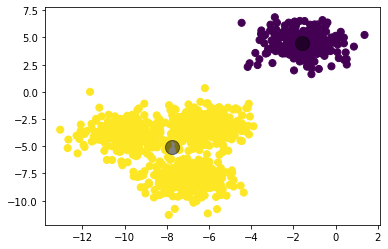

In [41]:
plt.scatter(X[:, 0], X[:, 1], c=P, s=50, cmap='viridis')

centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Para o método da silhueta, temos que k=2 e k=4, portanto, plotei a situação de k=2 porque já havia plotado a solução para k=4.